## ДЗ №1

1. Построить модель линейной регрессии для данных из файла data.csv

[[240000]
 [139800]
 [150500]
 [185530]
 [176000]
 [114800]
 [166800]
 [ 89000]
 [144500]
 [ 84000]
 [ 82029]
 [ 63060]
 [ 74000]
 [ 97500]
 [ 67000]
 [ 76025]
 [ 48235]
 [ 93000]
 [ 60949]
 [ 65674]
 [ 54000]
 [ 68500]
 [ 22899]
 [ 61789]]
[[3650]
 [3800]
 [4400]
 [4450]
 [5250]
 [5350]
 [5800]
 [5990]
 [5999]
 [6200]
 [6390]
 [6390]
 [6600]
 [6800]
 [6800]
 [6900]
 [6900]
 [6990]
 [7490]
 [7555]
 [7990]
 [7990]
 [7990]
 [8290]]
0.7329747078314965
[8499.59964993] [[-0.02144896]]
[[8499.58892545]]
[8499.59964993 3351.84838792]


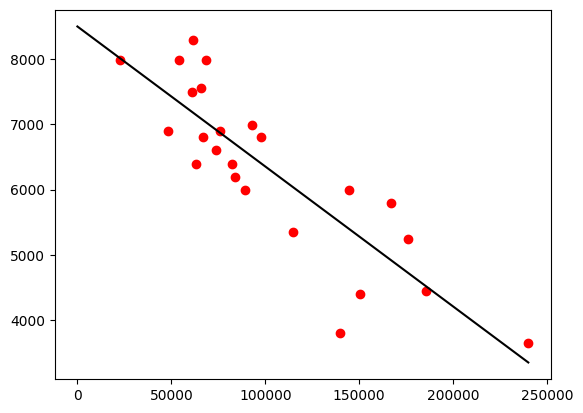

In [28]:
import csv

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

f = open("data.csv", "r")
reader = csv.reader(f)
rows = np.array(list(reader)[1:], dtype='i')
x = rows[:, 0].reshape(-1, 1)
y = rows[:, 1].reshape(-1, 1)
print(x)
print(y)
reg = LinearRegression().fit(x, y)

print(reg.score(x, y))
print(reg.intercept_, reg.coef_)
print(reg.predict(np.array([[.5]])))
X_test = [0, np.max(x)]
y_test = reg.intercept_[0] + reg.coef_[0] * X_test

print(y_test)

plt.figure()
plt.scatter(x, y, c='red')
plt.plot(X_test, y_test, c='black')
plt.show()

## ДЗ №2

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Найти лучший классификатор (и лучшие параметры) для этого набора данных.
3. Выведите в графическом виде все примеры, где лучший классификатор ошибся.
4. Сравнить результат с классификацией датасета digits, предобработанного алгоритмом t-SNE.

/home/sudden_appearance/.cache/pypoetry/virtualenvs/machine-learning-U845m8G1-py3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sudden_appearance/.cache/pypoetry/virtualenvs/machine-learning-U845m8G1-py3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


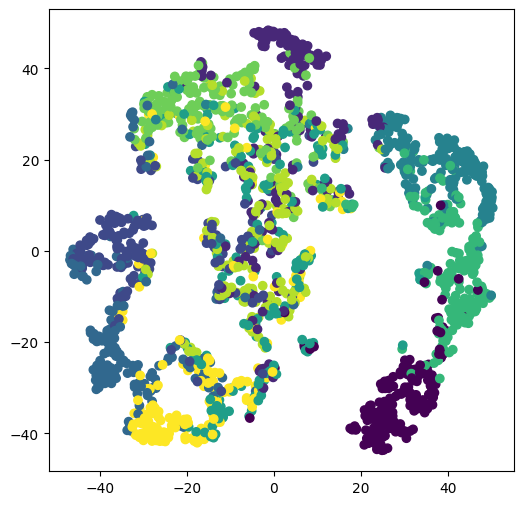

In [146]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)

method = ''

if method == 'pca':
    X = pca.fit_transform(digits.data)
else:
    X = TSNE(n_components=2, random_state=0).fit_transform(X)
y = digits.target

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

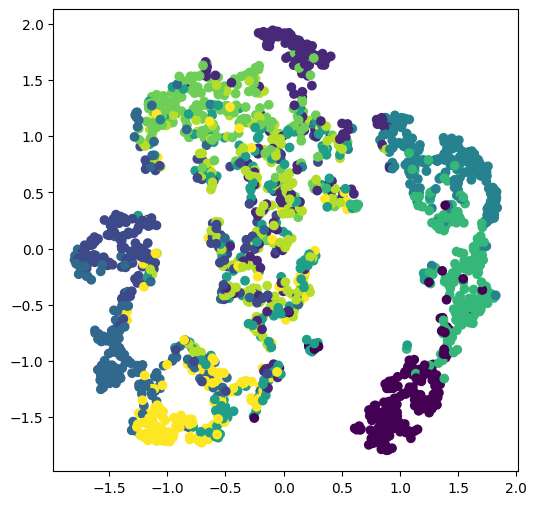

In [147]:
from sklearn.preprocessing import StandardScaler

X_scale = StandardScaler()
X_ = X_scale.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_[:, 0], X_[:, 1], c=y)
plt.show()

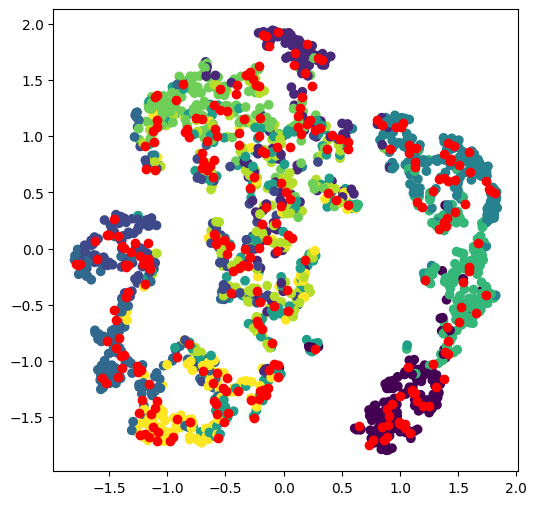

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.15)
image_train, image_test, _, _ = train_test_split(digits.data, y, test_size=0.15)

plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red')
plt.show()

KNeighborsClassifier:  0.662962962962963
DecisionTreeClassifier:  0.6111111111111112
RandomForestClassifier:  0.6444444444444445
SVM[linear]:  0.6185185185185185
SVM[rbf]:  0.6555555555555556
LogisticRegression:  0.6
MultinomialNB:  0.6296296296296297
Best model: KNeighborsClassifier() with score 0.662962962962963


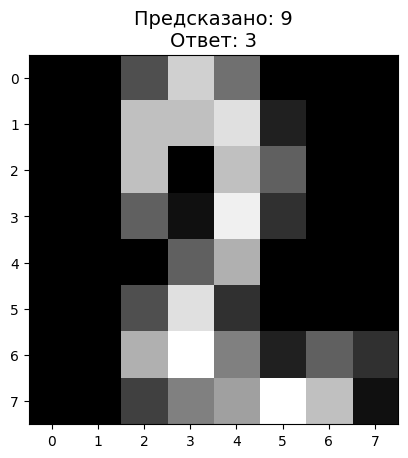

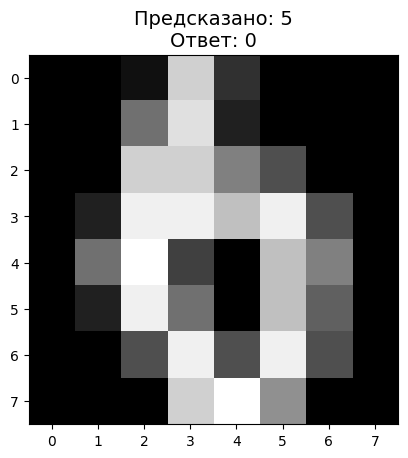

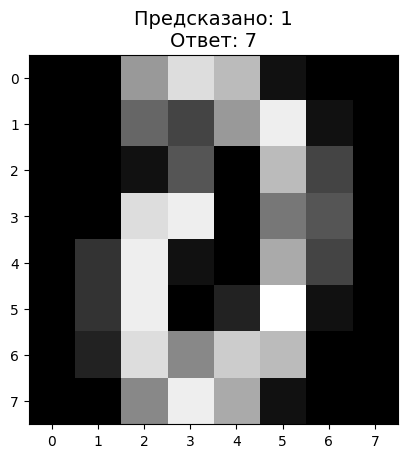

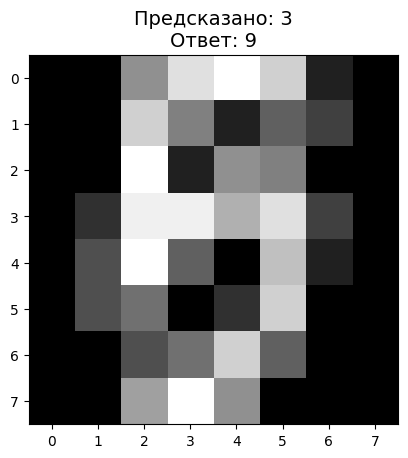

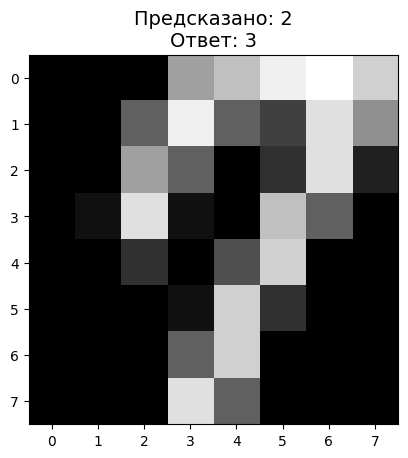

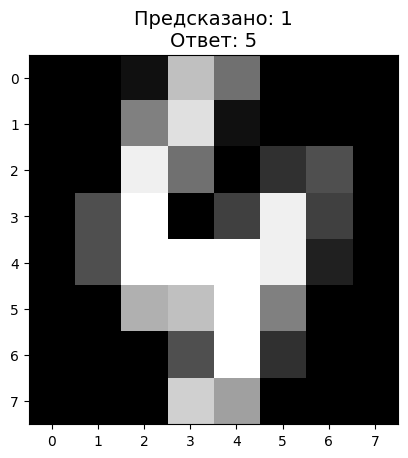

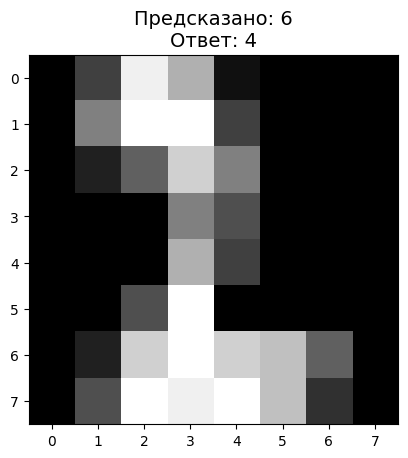

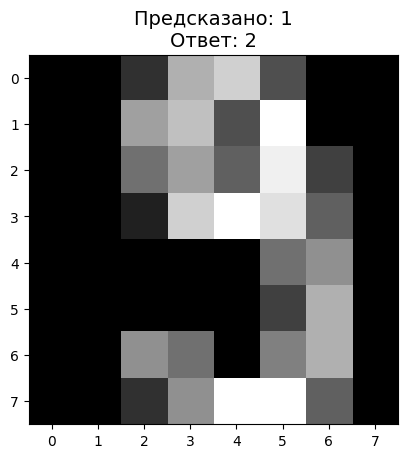

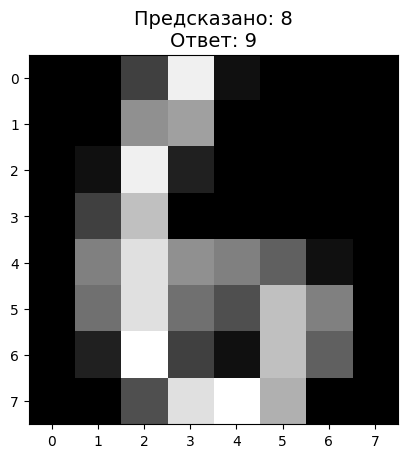

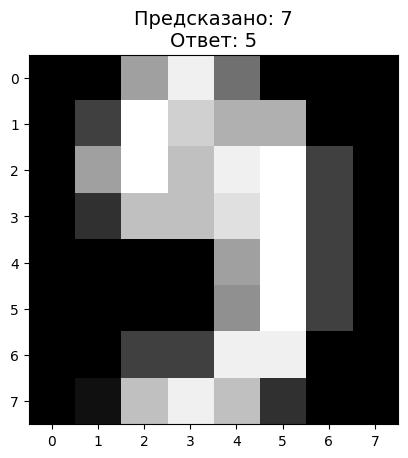

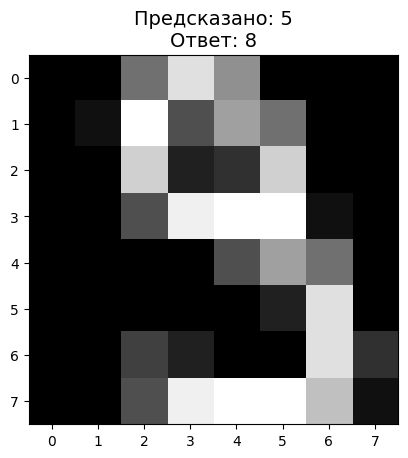

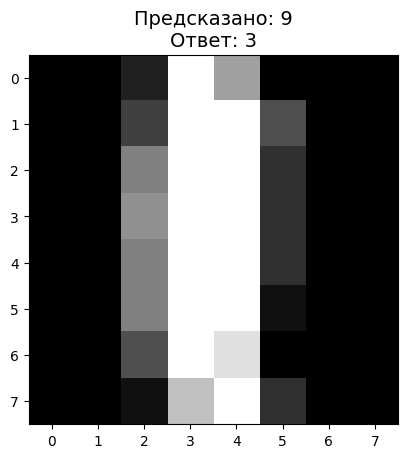

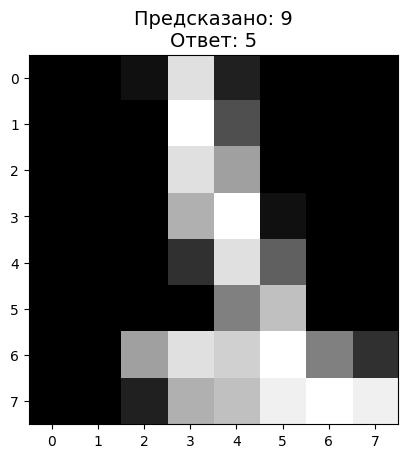

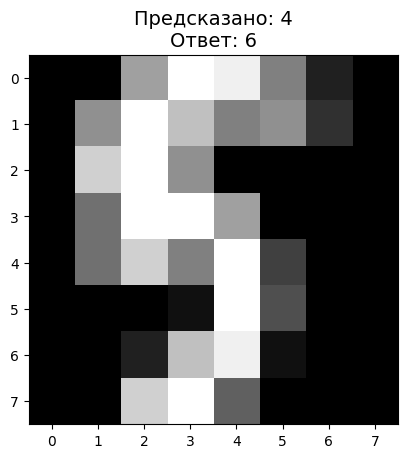

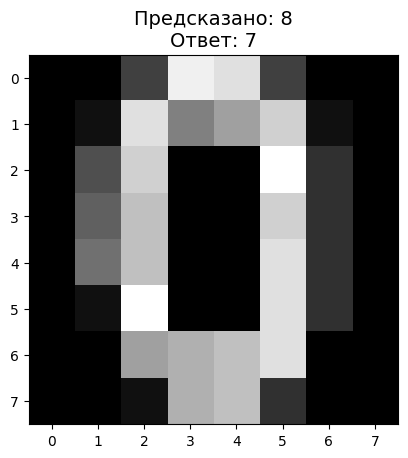

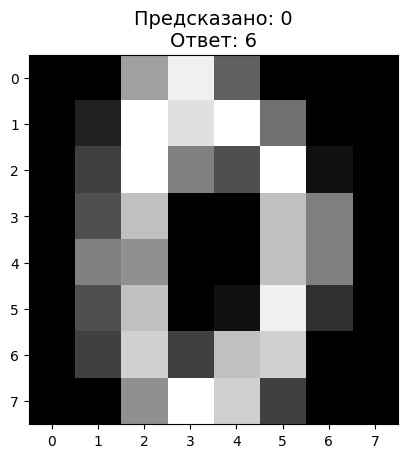

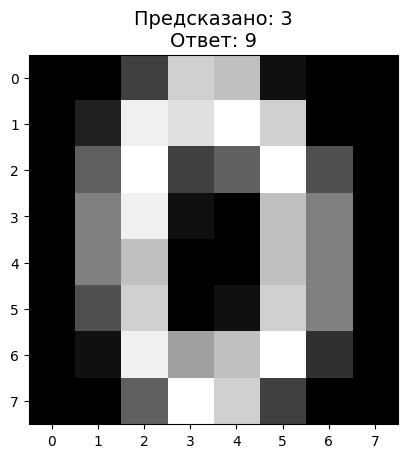

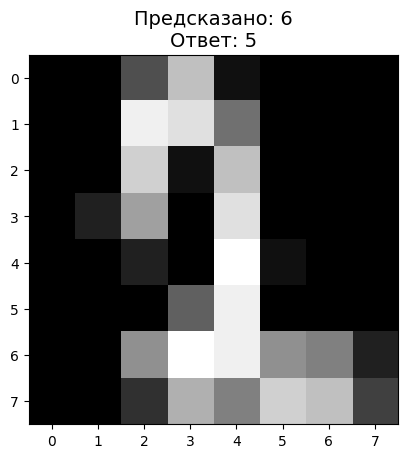

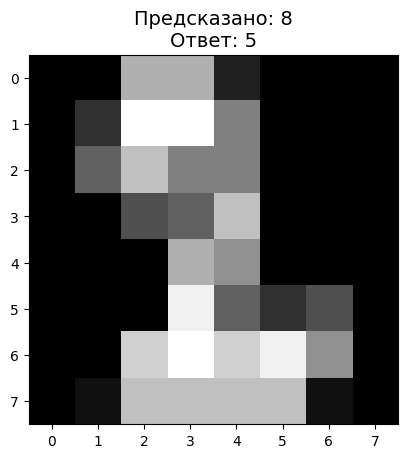

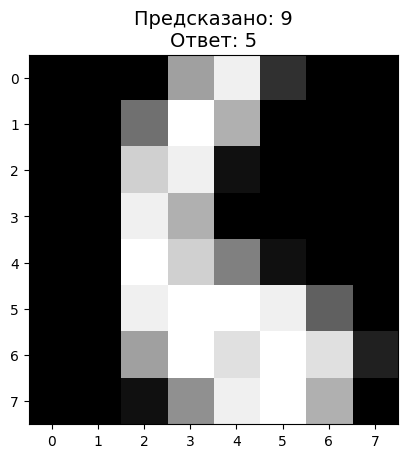

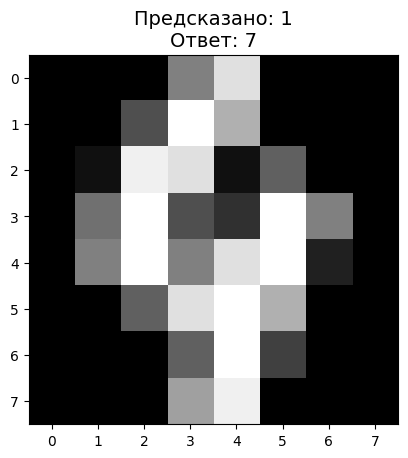

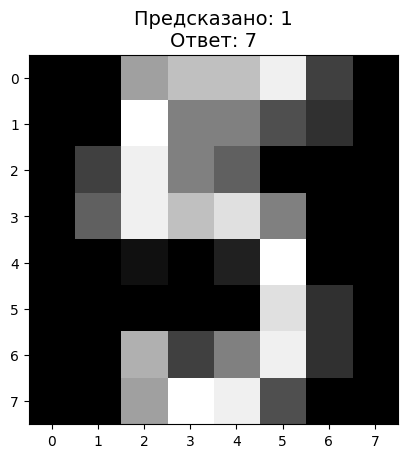

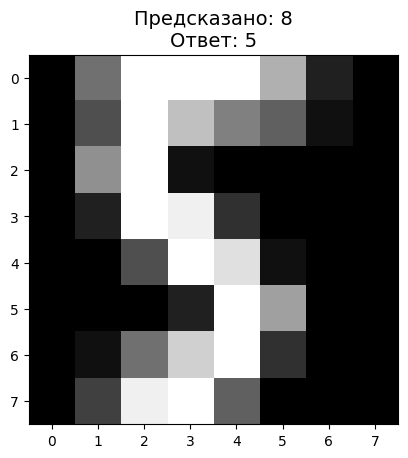

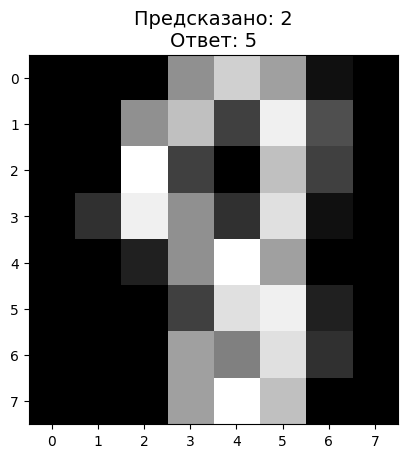

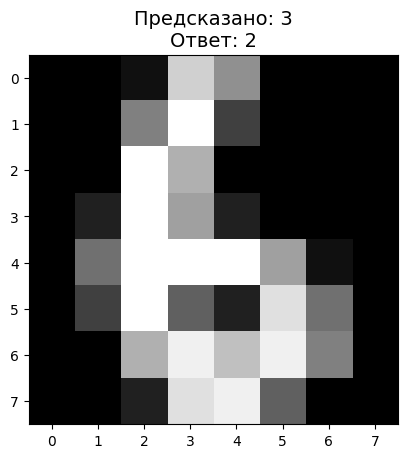

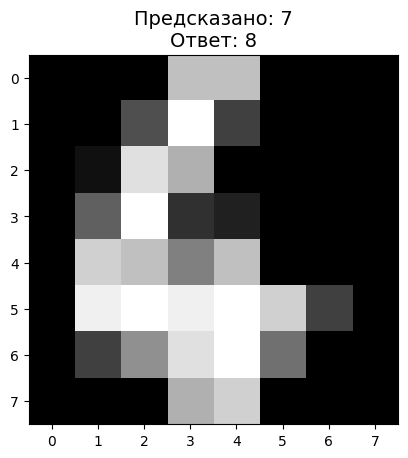

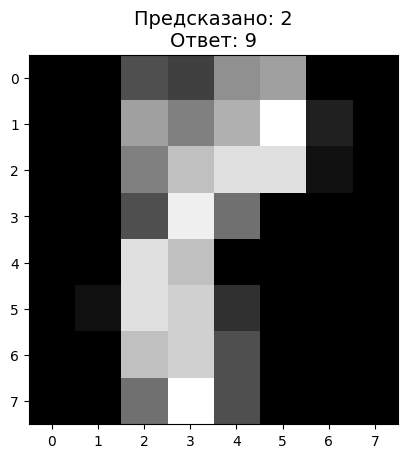

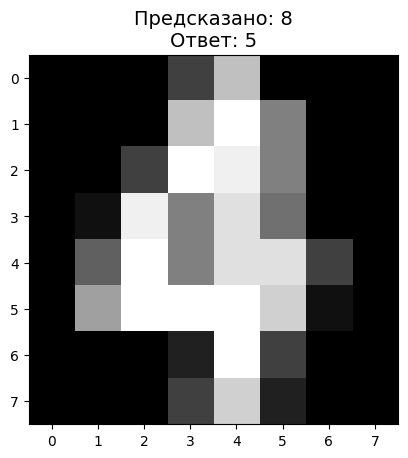

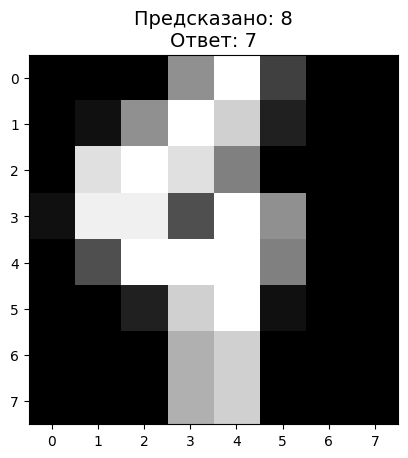

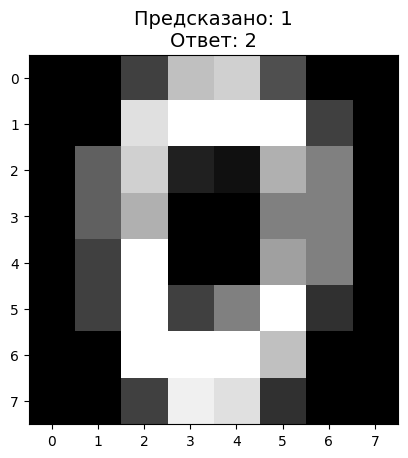

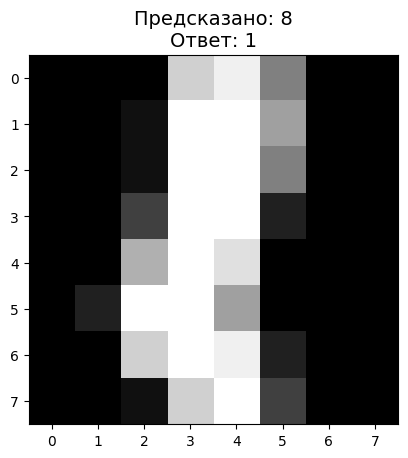

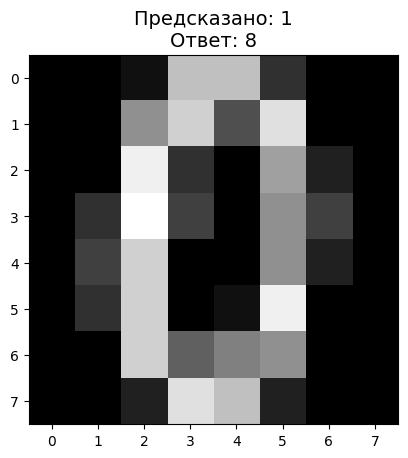

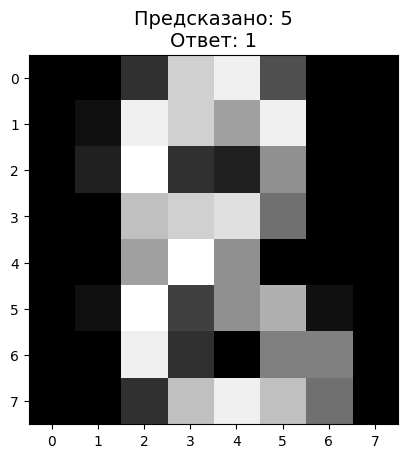

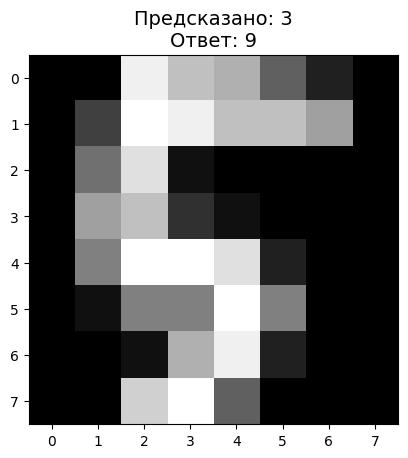

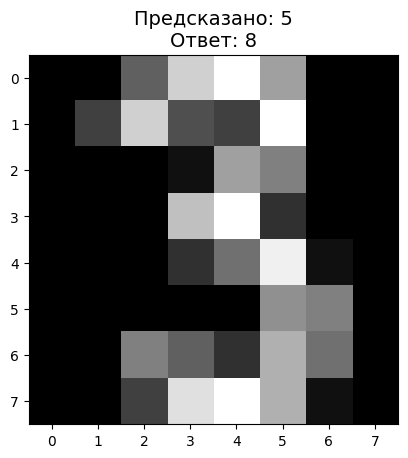

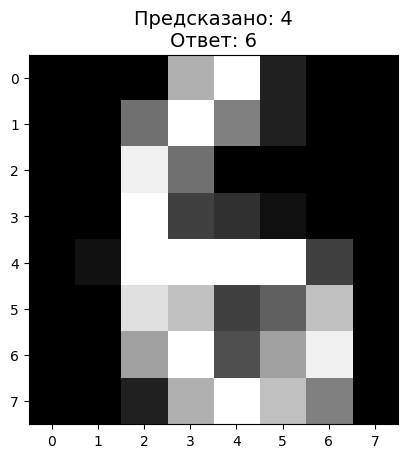

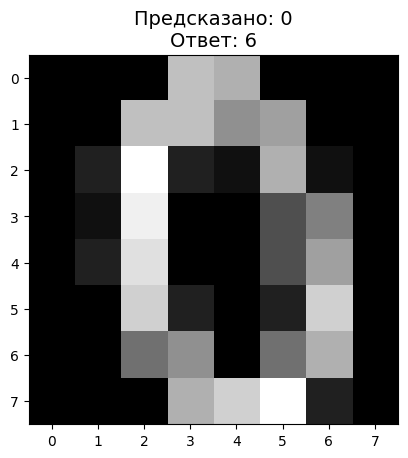

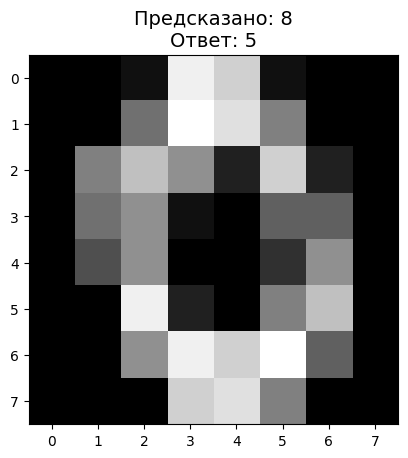

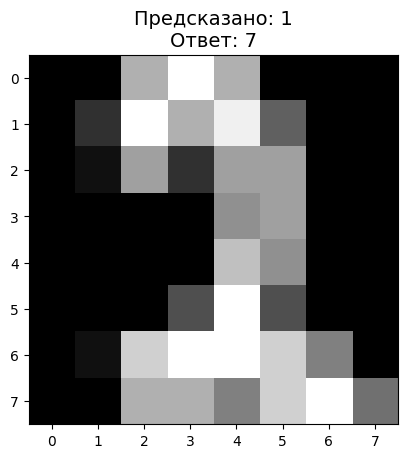

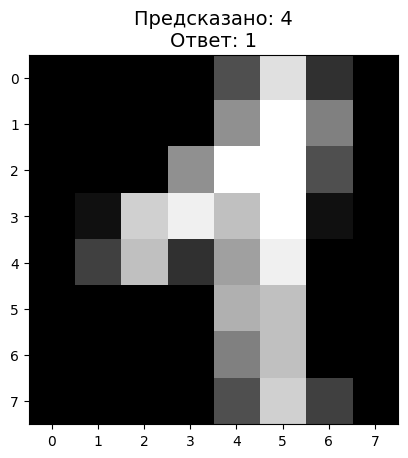

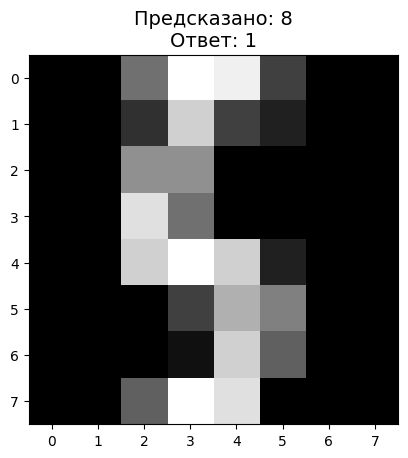

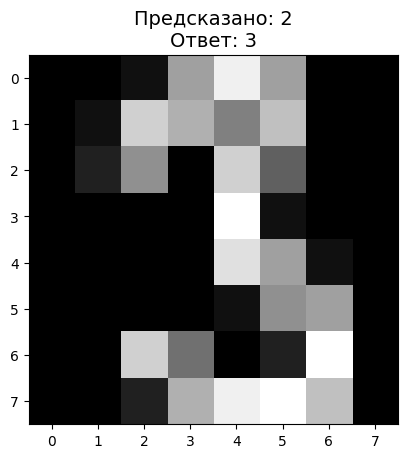

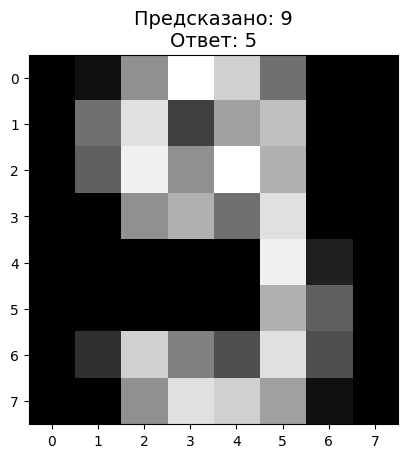

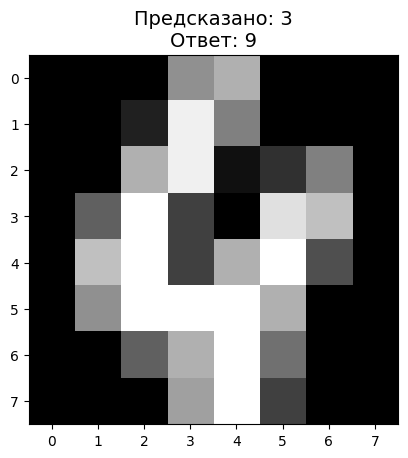

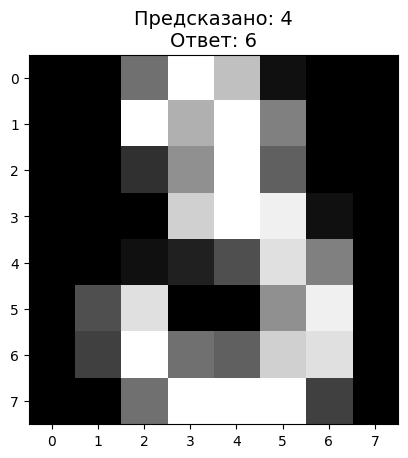

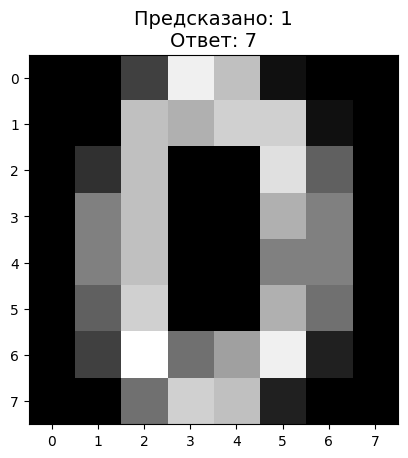

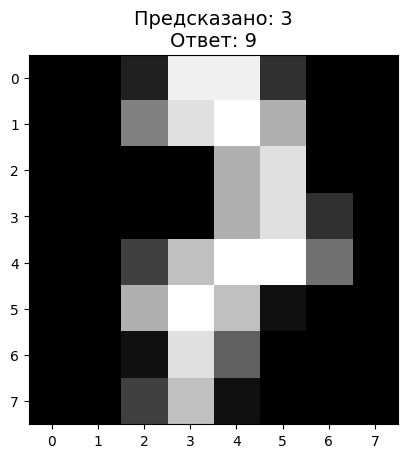

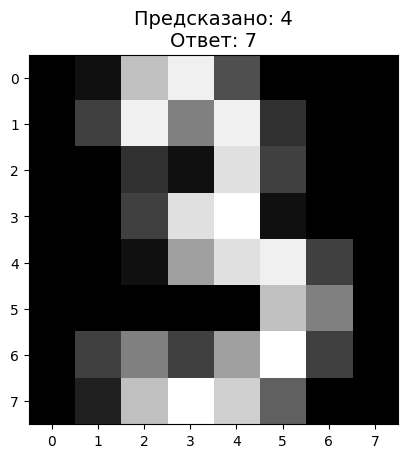

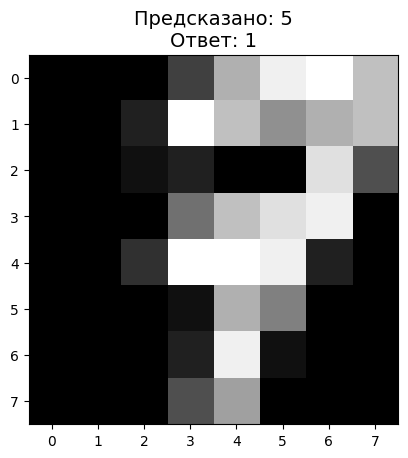

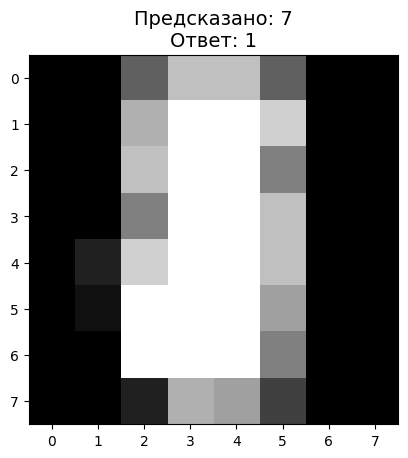

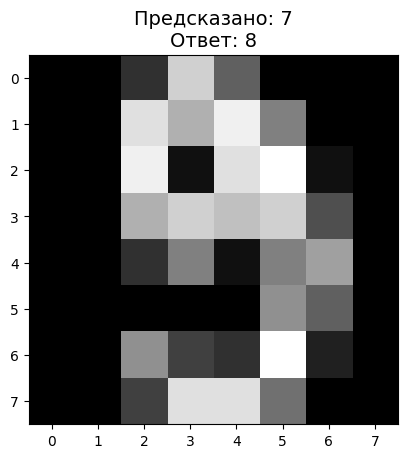

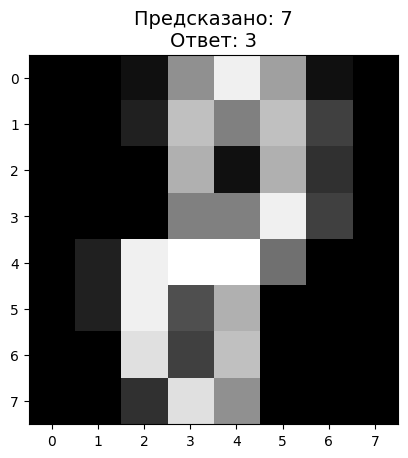

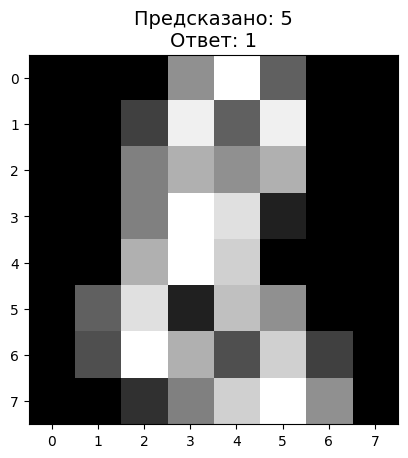

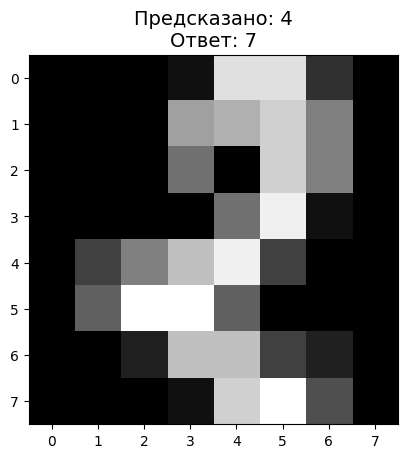

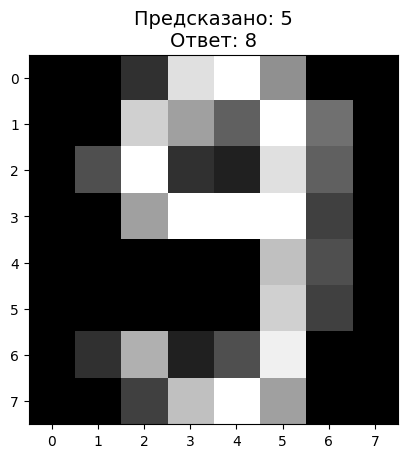

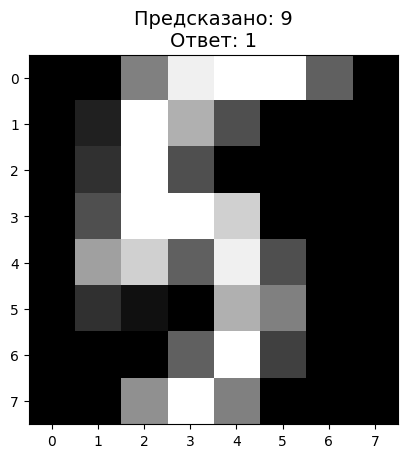

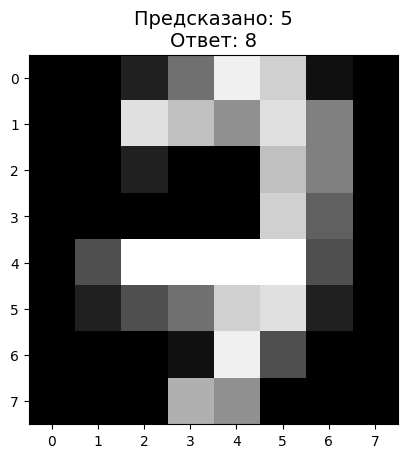

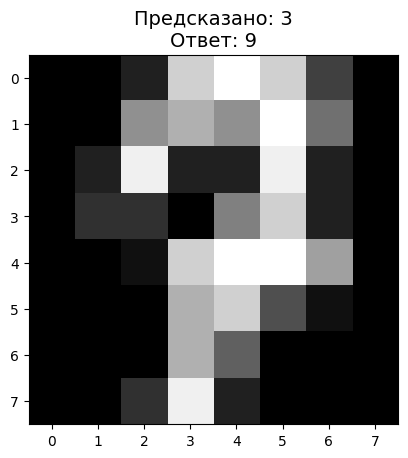

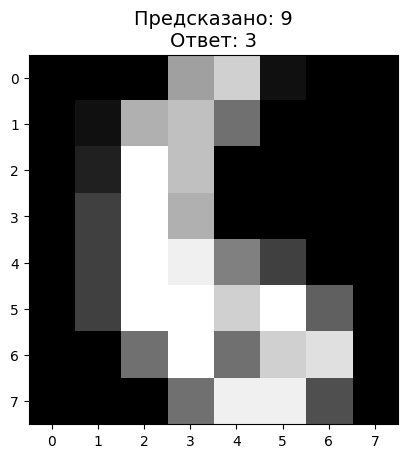

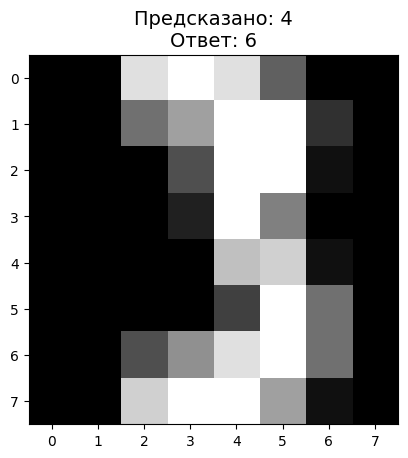

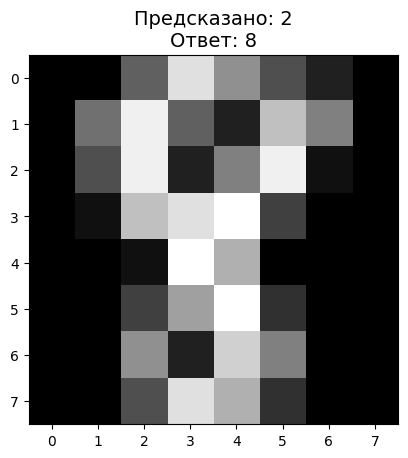

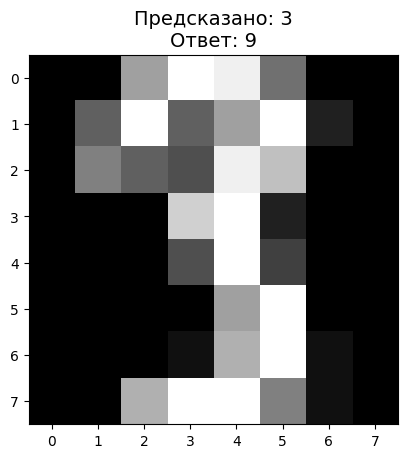

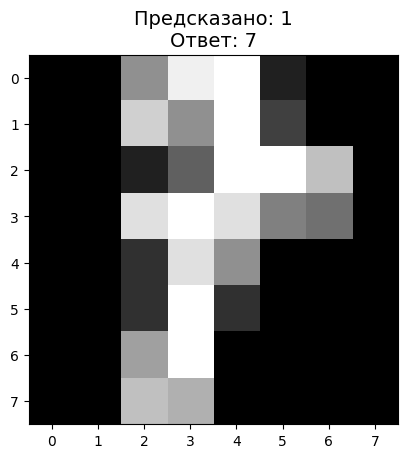

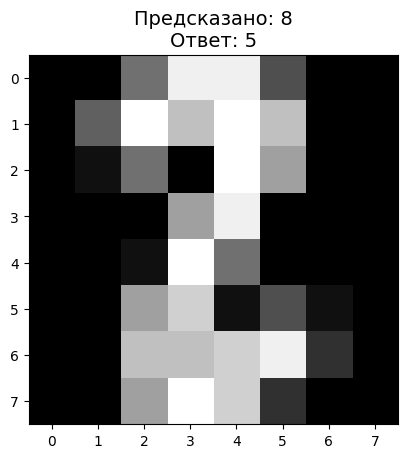

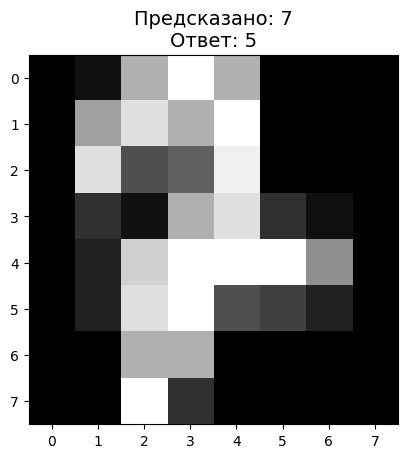

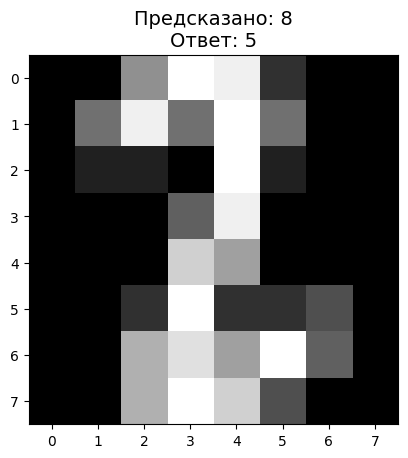

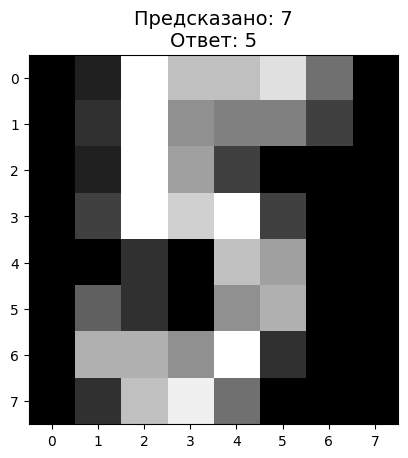

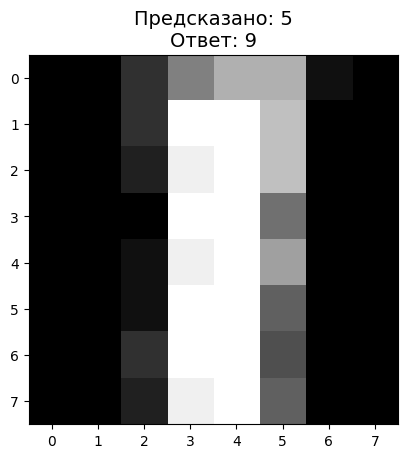

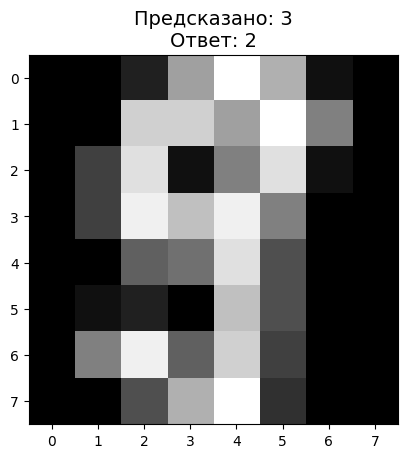

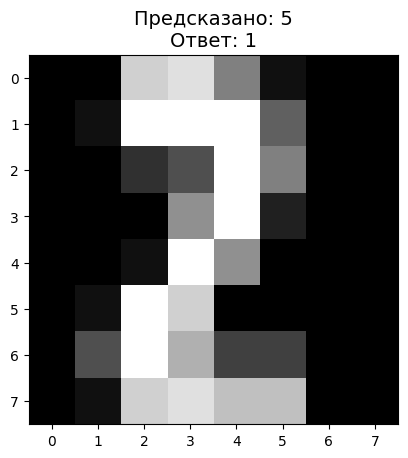

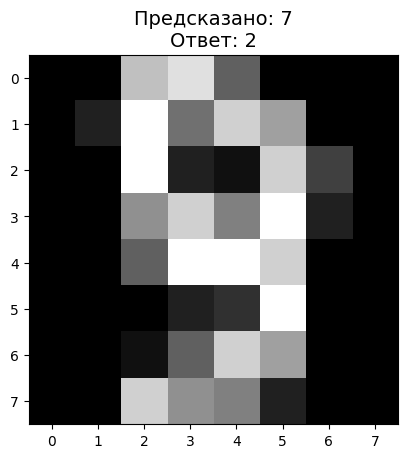

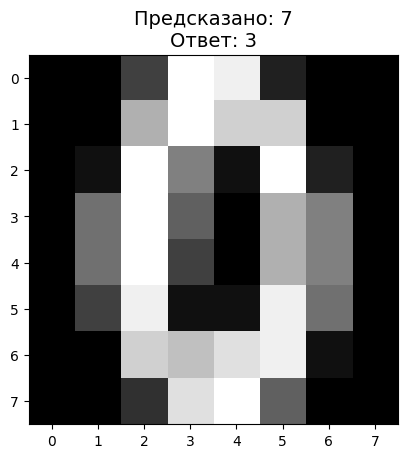

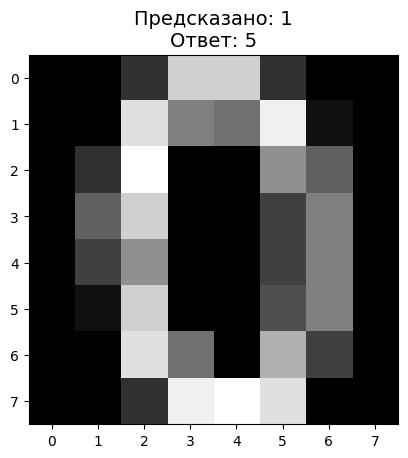

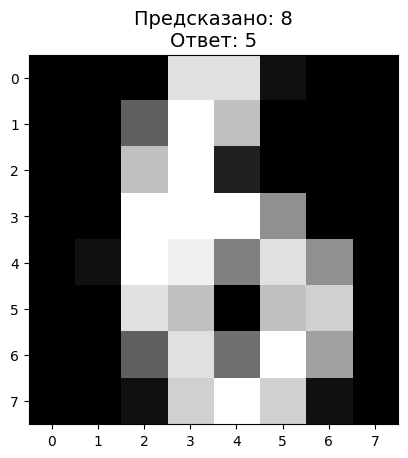

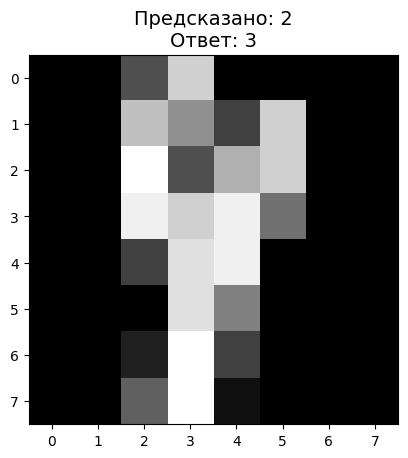

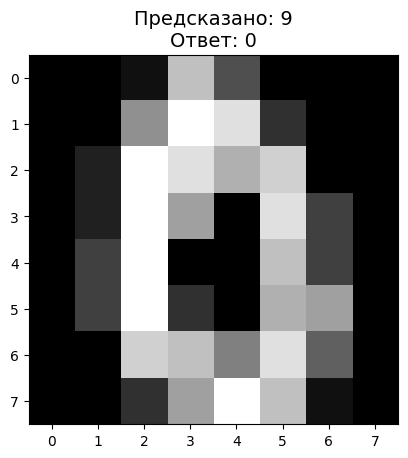

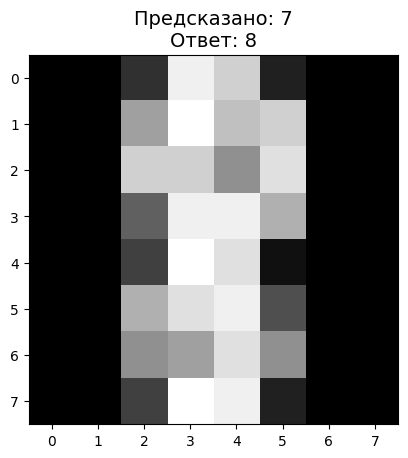

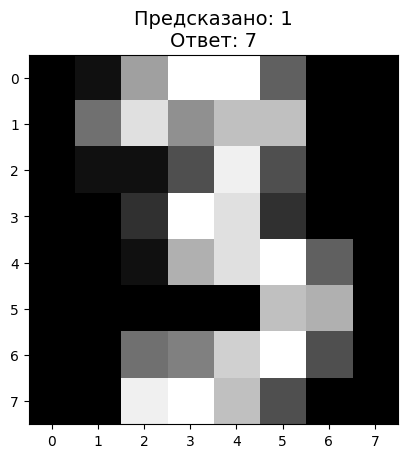

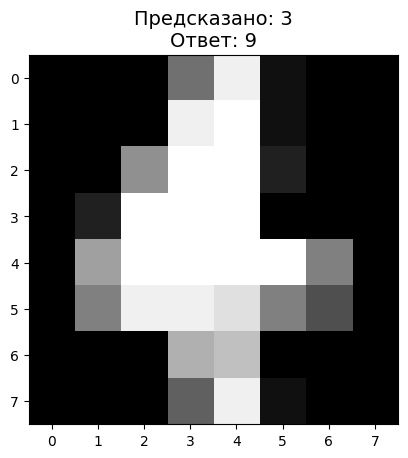

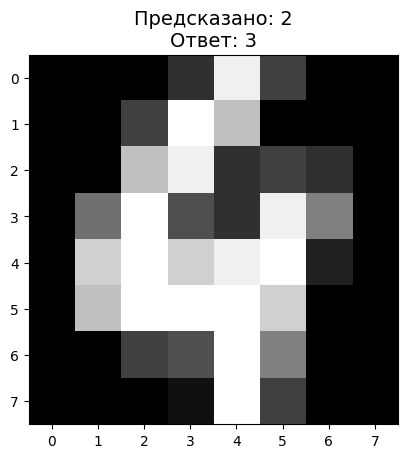

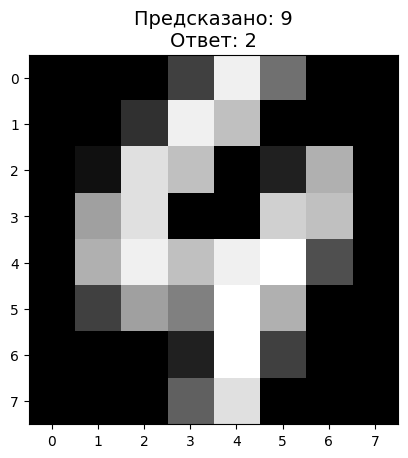

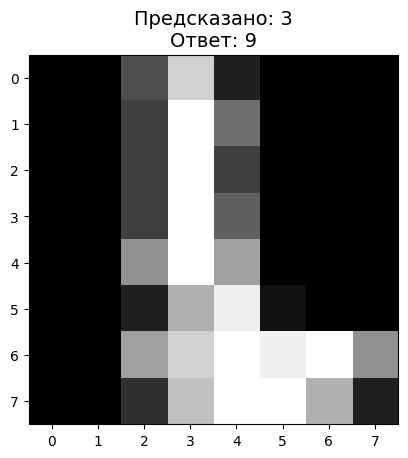

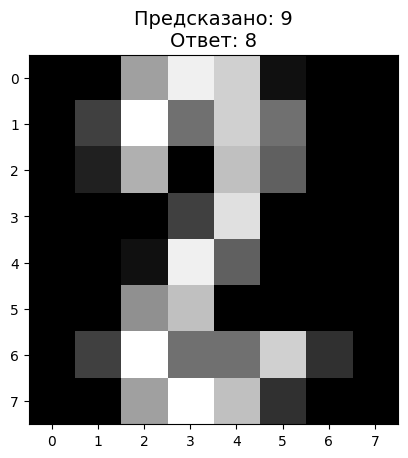

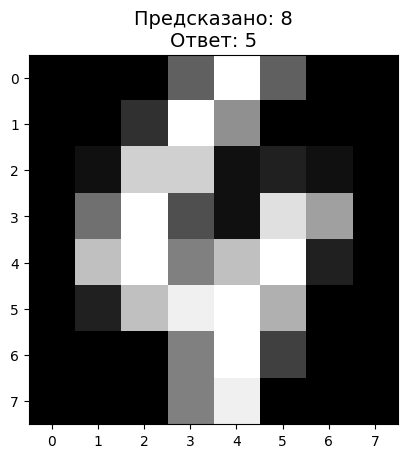

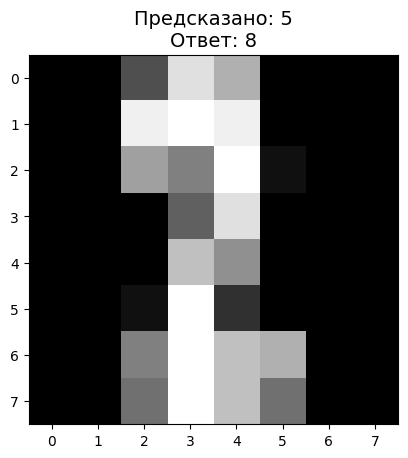

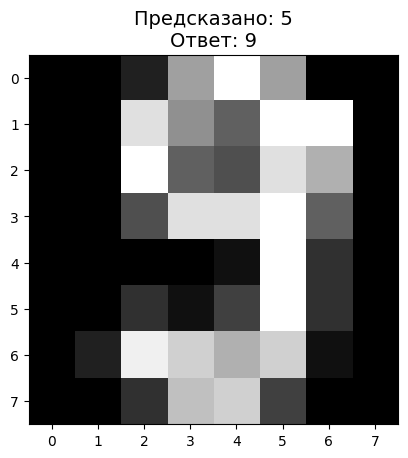

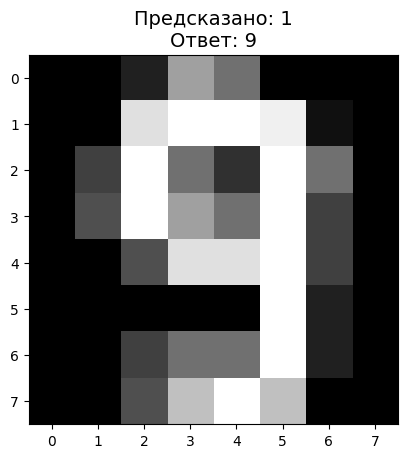

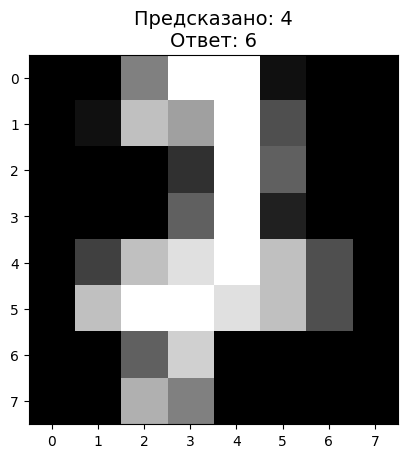

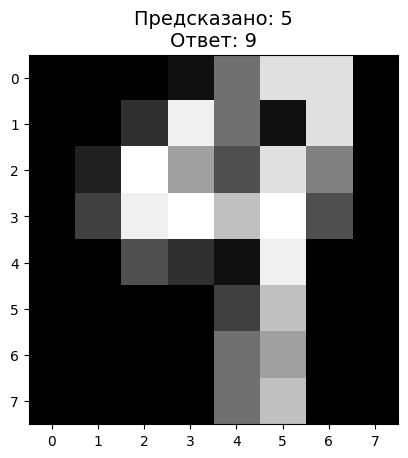

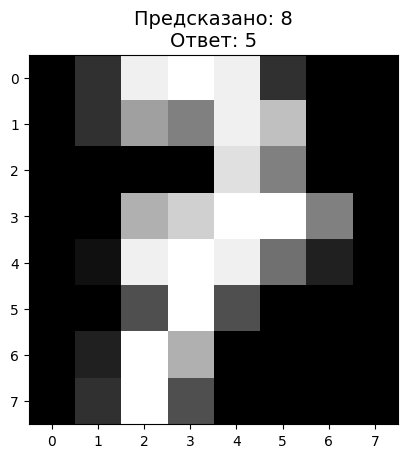

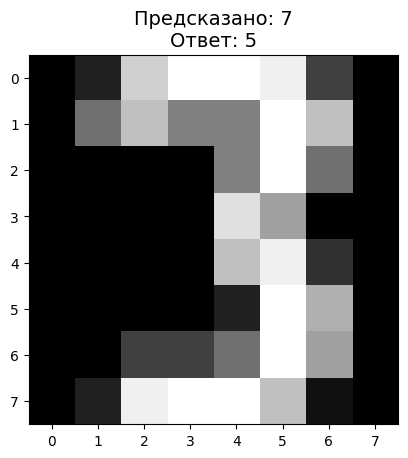

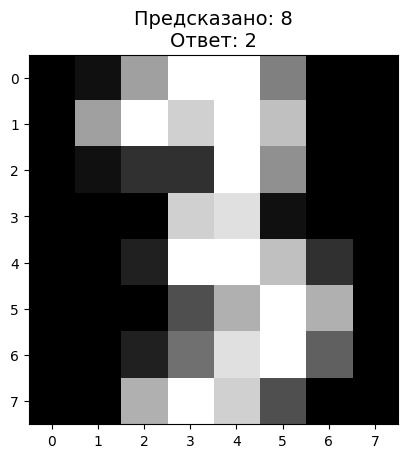

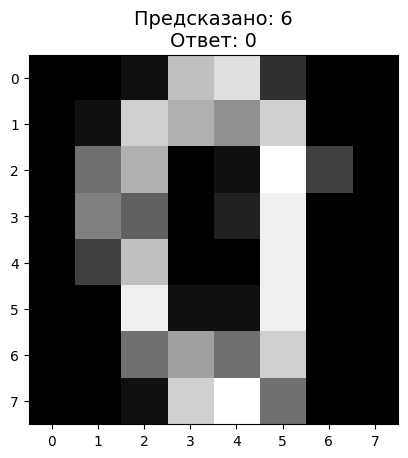

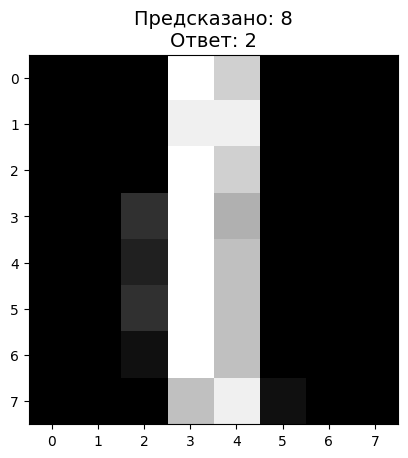

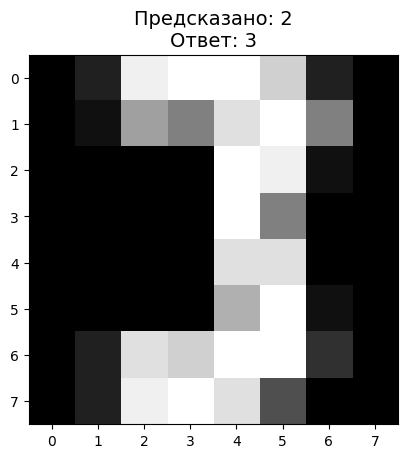

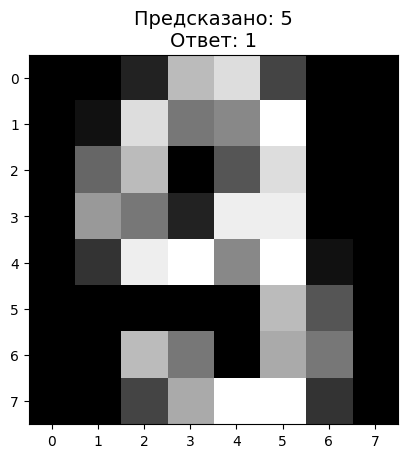

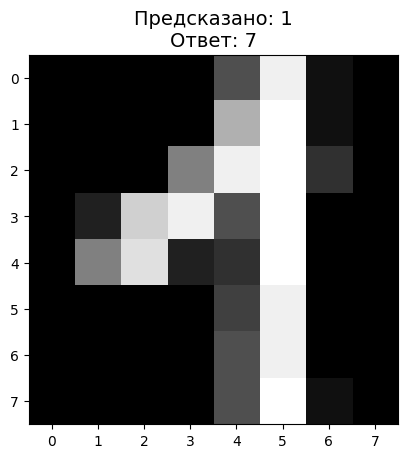

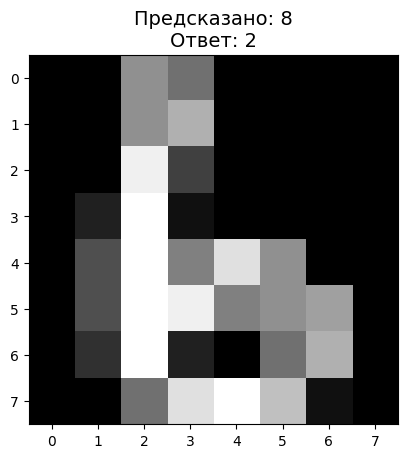

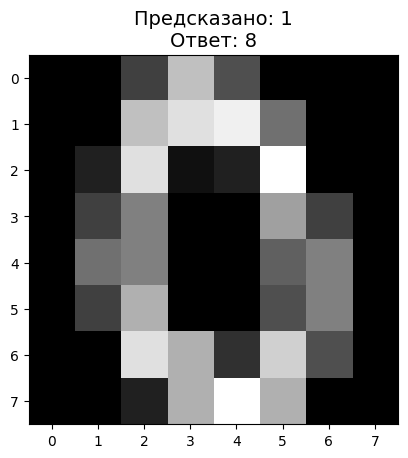

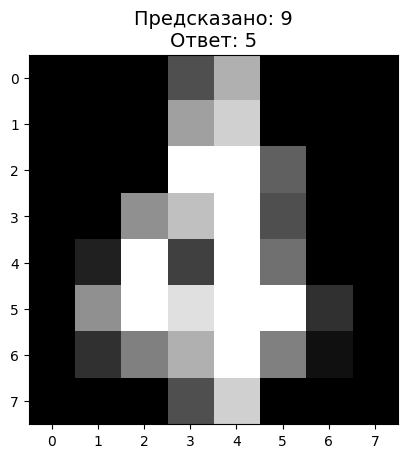

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

model = KNeighborsClassifier(n_neighbors=5, p=2).fit(X_train, y_train)
score = accuracy_score(model.predict(X_test), y_test)
print('KNeighborsClassifier: ', score)
best_model, highest_score = model, score

model = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
score = accuracy_score(model.predict(X_test), y_test)
print('DecisionTreeClassifier: ', score)
best_model, highest_score = (model, score) if score >= highest_score else (best_model, highest_score)

model = RandomForestClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
score = accuracy_score(model.predict(X_test), y_test)
print('RandomForestClassifier: ', score)
best_model, highest_score = (model, score) if score >= highest_score else (best_model, highest_score)

model = SVC(kernel='linear', C=1, gamma=.000001).fit(X_train, y_train)
score = accuracy_score(model.predict(X_test), y_test)
print('SVM[linear]: ', score)
best_model, highest_score = (model, score) if score >= highest_score else (best_model, highest_score)

model = SVC(kernel='rbf', C=1, gamma=1).fit(X_train, y_train)
score = accuracy_score(model.predict(X_test), y_test)
print('SVM[rbf]: ', score)
best_model, highest_score = (model, score) if score >= highest_score else (best_model, highest_score)

model = LogisticRegression(random_state=0).fit(X_train, y_train)
score = accuracy_score(model.predict(X_test), y_test)
print('LogisticRegression: ', score)
best_model, highest_score = (model, score) if score >= highest_score else (best_model, highest_score)

model = GaussianNB().fit(X_train, y_train)
score = accuracy_score(model.predict(X_test), y_test)
print('MultinomialNB: ', score)
best_model, highest_score = (model, score) if score >= highest_score else (best_model, highest_score)

print("Best model:", best_model, "with score", highest_score)

predictions = model.predict(X_test)
errors = [[predicted, real, image] for predicted, real, image in zip(predictions, y_test, image_test) if
    predicted != real]

for i, (predicted, real, image) in enumerate(errors):
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title(f"Предсказано: {predicted}\nОтвет: {real}", fontsize=14)
    plt.show()